# Regresión logística: Regularización
M2U5 - Ejercicio 5

## ¿Qué vamos a hacer?
- Implementar la función de coste y descenso de gradiente regularizadas
- Comprobar el entrenamiento representando la evolución de la función de coste
- Hallar el parámetro de regularización *lambda* óptimo por validación

Recuerda seguir las instrucciones para las entregas de prácticas indicadas en [Instrucciones entregas](https://github.com/Tokio-School/Machine-Learning/blob/main/Instrucciones%20entregas.md).

## Instrucciones
Una vez implementada la función de coste y gradient descent sin regularizar, vamos a regularizarlas y entrenar un modelo de regresión logística completo, comprobándolo por validación y evaluándolo sobre un subset de test.

In [1]:
import time
import numpy as np
from sklearn.utils import shuffle
from matplotlib import pyplot as plt

## Crear un dataset sintético para regresión logística

Vamos a crear un dataset sintético de 2 clases únicamente (0 y 1) para comprobar esta implementación de un modelo de clasificación binaria, entrenado completamente, paso a paso.

Para ello, crea un dataset sintético para regresión logística con término de bias y error de forma manual (para tener disponible *Theta_verd*) con el código que has usado en el ejercicio anterior:

In [2]:
# TODO: Genera un dataset sintético con término de bias y error de forma manual
m = 100
n = 1

# Genera un array 2D m x n con valores aleatorios entre -1 y 1
# Insértale el término de bias como una primera columna de 1s
np.random.seed(42)
X = np.random.uniform(-1, 1, (m,n))
bias = np.ones((m, 1))
X = np.concatenate([bias, X], axis=1)


# Genera un array de theta de n + 1 valores aleatorios entre [0, 1)
Theta_verd = np.random.random(n + 1)

# Calcula Y en función de X y Theta_verd
# Transforma Y a valores de 1. y 0. (float) cuando Y >= 0.0
# Con una probabilidad como término de error, itera sobre Y y modifica la clase asignada a la contraria, 1. a 0. y 0. a 1.
error = 0.15

Y = X @ Theta_verd
Y = (Y >= 0).astype(float)
flip = np.random.rand(m) < error
Y[flip] = 1 - Y[flip]


# Muestra Theta y sus dimensiones
print('Theta a estimar y sus dimensiones:')
print(Theta_verd)
print(Theta_verd.shape)
print()

# Primeras 10 filas de X y Y
print('Primeras 10 filas de X e Y:')
print('X[:10]:\n', X[:10])
print('Y[:10]:\n', Y[:10])
print()

# Dimensiones de X e Y
print('Dimensiones de X e Y:')
print('X:', X.shape)
print('Y:', Y.shape)

Theta a estimar y sus dimensiones:
[0.03142919 0.63641041]
(2,)

Primeras 10 filas de X e Y:
X[:10]:
 [[ 1.         -0.25091976]
 [ 1.          0.90142861]
 [ 1.          0.46398788]
 [ 1.          0.19731697]
 [ 1.         -0.68796272]
 [ 1.         -0.68801096]
 [ 1.         -0.88383278]
 [ 1.          0.73235229]
 [ 1.          0.20223002]
 [ 1.          0.41614516]]
Y[:10]:
 [0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]

Dimensiones de X e Y:
X: (100, 2)
Y: (100,)


## Implementar la función de activación sigmoide

Copia tu celda con la función sigmoide:

In [3]:
# TODO: Implementa la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

## Preprocesar los datos

Al igual que hacíamos para la regresión lineal, vamos a preprocesar los datos completamente, siguiendo los 3 pasos habituales:

- Reordenarlos aleatoriamente.
- Normalizarlos.
- Dividirlos en subsets de entrenamiento, validación y test.

Puedes hacerlo manualmente o con las funciones auxiliares de Scikit-learn.

### Reordenar el dataset aleatoriamente

Reordena los datos del dataset *X* e *Y*:

In [4]:

print('Primeras 10 filas y 5 columnas de X e Y:')
print(X[:10])
print(Y[:10])
print()

print('Reordenamos X e Y:')
X, Y = shuffle(X, Y, random_state=42)

print('Primeras 10 filas y 5 columnas de X e Y:')
print(X[:10])
print(Y[:10])
print()

print('Dimensiones de X e Y:')
print(X.shape)
print(Y.shape)


Primeras 10 filas y 5 columnas de X e Y:
[[ 1.         -0.25091976]
 [ 1.          0.90142861]
 [ 1.          0.46398788]
 [ 1.          0.19731697]
 [ 1.         -0.68796272]
 [ 1.         -0.68801096]
 [ 1.         -0.88383278]
 [ 1.          0.73235229]
 [ 1.          0.20223002]
 [ 1.          0.41614516]]
[0. 1. 1. 1. 0. 0. 0. 0. 1. 1.]

Reordenamos X e Y:
Primeras 10 filas y 5 columnas de X e Y:
[[ 1.         -0.8728833 ]
 [ 1.          0.7896547 ]
 [ 1.          0.54448954]
 [ 1.          0.32504457]
 [ 1.         -0.48244004]
 [ 1.         -0.11969501]
 [ 1.         -0.4157107 ]
 [ 1.          0.72620685]
 [ 1.         -0.95883101]
 [ 1.         -0.25091976]]
[0. 1. 1. 1. 0. 0. 0. 1. 0. 0.]

Dimensiones de X e Y:
(100, 2)
(100,)


### Normalizar el dataset

Implementa la función de normalización y normaliza el dataset de ejemplos *X*:

In [5]:
# TODO: Normaliza el dataset con una función de normalización

# Copia tu función de normalización utilizada en la unidad de regresión lineal
def normalize(x, mu, std):
    return (x - mu) / std

# Halla la media y la desviación típica de las características de X (columnas), excepto la primera (bias)
mu = X[:, 1:].mean(axis=0)
std = X[:, 1:].std(axis=0)

print('X original:')
print(X[:10])
print(X.shape)

print('Media y desviación típica de las características:')
print(mu)
print(mu.shape)
print(std)
print(std.shape)

print('X normalizada:')
X_norm = np.copy(X)
X_norm[:, 1:] = normalize(X[:, 1:], mu, std)
print(X_norm[:10])
print(X_norm.shape)

X original:
[[ 1.         -0.8728833 ]
 [ 1.          0.7896547 ]
 [ 1.          0.54448954]
 [ 1.          0.32504457]
 [ 1.         -0.48244004]
 [ 1.         -0.11969501]
 [ 1.         -0.4157107 ]
 [ 1.          0.72620685]
 [ 1.         -0.95883101]
 [ 1.         -0.25091976]]
(100, 2)
Media y desviación típica de las características:
[-0.05963851]
(1,)
[0.59199645]
(1,)
X normalizada:
[[ 1.         -1.37373253]
 [ 1.          1.43462551]
 [ 1.          1.02049269]
 [ 1.          0.6498064 ]
 [ 1.         -0.71419604]
 [ 1.         -0.1014474 ]
 [ 1.         -0.6014769 ]
 [ 1.          1.32744945]
 [ 1.         -1.51891535]
 [ 1.         -0.32311215]]
(100, 2)


### Dividir el dataset en subsets de entrenamiento, validación y test

Divide el dataset de *X* e *Y* en 3 subsets con el ratio habitual, 60%/20%/20%.

Si tu nº de ejemplos es mucho más alto o bajo, siempre puedes modificar este ratio por otro como 50/25/25 o 80/10/10.

In [6]:
# TODO: Divide el dataset X e Y en los 3 subsets según los ratios indicados

ratio = [60, 20, 20]
print('Ratio:\n', ratio, ratio[0] + ratio[1] + ratio[2])

r = [0, 0]
# Consejo: la función round() y el atributo x.shape pueden serte útiles
r[0] = round(m * ratio[0] / 100)
r[1] = round(m * (ratio[0] + ratio[1]) / 100)
print('Índices de corte:\n', r)

# Consejo: la función np.array_split() puede serte útil
X_train, X_val, X_test = np.split(X, r)
Y_train, Y_val, Y_test = np.split(Y, r)


print('Tamaños de los subsets:')
print(X_train.shape)
print(Y_train.shape)
print(X_val.shape)
print(Y_val.shape)
print(X_test.shape)
print(Y_test.shape)

Ratio:
 [60, 20, 20] 100
Índices de corte:
 [60, 80]
Tamaños de los subsets:
(60, 2)
(60,)
(20, 2)
(20,)
(20, 2)
(20,)


## Implementar la función de coste regularizada

Vamos a implementar la función de coste regularizada. Esta función será similar a la que implementamos para regresión lineal en un ejercicio anterior.

Función de coste regularizada:

$$ Y = h_\Theta(x) = g(X \times \Theta^T) $$
$$ J(\Theta) = - [\frac{1}{m} \sum\limits_{i=0}^{m} (y^i log(h_\theta(x^i)) + (1 - y^i) log(1 - h_\theta(x^i))] + \frac{\lambda}{2m} \sum_{j=1}^{n} \Theta_j^2 $$

In [7]:
# TODO: Implementa la función de coste regularizada para regresión logística

def regularized_logistic_cost_function(x, y, theta, lambda_=0.):
    """ Computa la función de coste para el dataset y coeficientes considerados

    Argumentos posicionales:
    x -- ndarray 2D con los valores de las variables independientes de los ejemplos, de tamaño m x n
    y -- ndarray 1D con la variable dependiente/objetivo, de tamaño m x 1 y valores 0 o 1
    theta -- ndarray 1D con los pesos de los coeficientes del modelo, de tamaño 1 x n (vector fila)
    lambda_ -- factor de regularización, por defecto 0.

    Devuelve:
    j -- float con el coste para dicho array theta
    """
    z = x @ theta
    h = sigmoid(z)

    h = np.clip(h, 1e-12, 1 - 1e-12)

    j = ( -y * np.log(h) - (1 - y) * np.log(1 - h) ).mean()

    reg = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    j += reg

    return float(j)

Comprueba tu implementación en las siguientes circunstancias:
1. Para *lambda* = 0:
    1. Usando *Theta_verd*, el coste debe ser 0.
    1. Según los valores de *theta* se alejen de *Theta_verd*, el coste debe ser mayor.
1. Para *lambda* != 0:
    1. Usando *Theta_verd*, el coste debe ser mayor de 0.
    1. Cuanto mayor es *lambda*, mayor es el coste.
    1. El crecimiento del coste en función de *lambda* es exponencial.

In [8]:
# TODO: Comprueba tu implementación sobre el dataset

theta = Theta_verd

j = regularized_logistic_cost_function(X, Y, theta)

print('Coste del modelo:')
print(j)
print('Theta comprobado y Theta real:')
print(theta)
print(Theta_verd)

j = regularized_logistic_cost_function(X, Y, theta, lambda_ = 10)

print('\nCoste del modelo:')
print(j)
print('Theta comprobado y Theta real:')
print(theta)
print(Theta_verd)

print('\nAumentamos Theta')

theta = Theta_verd + 10

j = regularized_logistic_cost_function(X, Y, theta)

print('\nCoste del modelo:')
print(j)
print('Theta comprobado y Theta real:')
print(theta)
print(Theta_verd)

j = regularized_logistic_cost_function(X, Y, theta, lambda_ = 10)

print('\nCoste del modelo:')
print(j)
print('Theta comprobado y Theta real:')
print(theta)
print(Theta_verd)

Coste del modelo:
0.6082034427187688
Theta comprobado y Theta real:
[0.03142919 0.63641041]
[0.03142919 0.63641041]

Coste del modelo:
0.6284543532970155
Theta comprobado y Theta real:
[0.03142919 0.63641041]
[0.03142919 0.63641041]

Aumentamos Theta

Coste del modelo:
3.1564865416747994
Theta comprobado y Theta real:
[10.03142919 10.63641041]
[0.03142919 0.63641041]

Coste del modelo:
8.813147863516825
Theta comprobado y Theta real:
[10.03142919 10.63641041]
[0.03142919 0.63641041]


## Entrenar un modelo inicial sobre el subset de entrenamiento

Al igual que hacíamos en ejercicios anteriores, vamos a entrenar un modelo inicial para comprobar que nuestra implementación y el dataset trabajan correctamente, y posteriormente podremos entrenar un modelo con validación sin problema.

Para ello, sigue los mismos pasos que seguiste para la regresión lineal:
- Entrena un modelo inicial sin regularización.
- Representa el histórico de la función de coste para comprobar su evolución.
- Si es necesario, modifica cualquier parámetro y reentrena el modelo. Usarás dichos parámetros en siguientes puntos.

Copia las celdas de ejercicios anteriores donde implementabas la función de coste en regresión logística sin regularizar y la celda donde entrenabas el modelo, y modifícalas para el caso de la regresión logística regularizda.

Recuerda las funciones de descenso de gradiente para regresión logística regularizada:

$$ Y = h_\Theta(x) = g(X \times \Theta^T) $$
$$ \theta_0 := \theta_0 - \alpha \frac{1}{m} \sum_{i=0}^{m}(h_\theta (x^i) - y^i) x_0^i $$
$$ \theta_j := \theta_j - \alpha [\frac{1}{m} \sum_{i=0}^{m}(h_\theta (x^i) - y^i) x_j^i + \frac{\lambda}{m} \theta_j]; \space j \in [1, n] $$
$$ \theta_j := \theta_j (1 - \alpha \frac{\lambda}{m}) - \alpha \frac{1}{m} \sum_{i=0}^{m}(h_\theta (x^i) - y^i) x_j^i; \space j \in [1, n] $$

In [9]:
# TODO: Copia la celda con el descenso de gradiente para regresión logística sin regularizar y modifícala para implementar la regularización
def regularized_cost_function_logistic(X, Y, theta, lambda_):
    m = X.shape[0]
    theta = theta.reshape(-1, 1)
    Y = Y.reshape(-1, 1)

    h = sigmoid(np.matmul(X, theta))

    cost = -(1/m) * np.sum(Y * np.log(h) + (1 - Y) * np.log(1 - h))
    reg = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)

    return float(cost + reg)


def gradient_descent_logistic_regularized(X, Y, theta, alpha, lambda_, e=1e-6, iter_=1000):
    iter_ = int(iter_)
    j_hist = []
    m, n = X.shape

    for k in range(iter_):
        h = sigmoid(np.matmul(X, theta.reshape(-1, 1)))
        grad = (1/m) * np.matmul(X.T, (h - Y.reshape(-1,1)))

        reg_term = (lambda_ / m) * theta.reshape(-1,1)
        reg_term[0] = 0

        grad += reg_term

        theta = theta - alpha * grad.flatten()

        cost = regularized_cost_function_logistic(X, Y, theta, lambda_)
        j_hist.append(cost)

        if k > 0 and abs(j_hist[-1] - j_hist[-2]) < e:
            print(f'Convergió en la iteración {k}')
            break
    else:
        print('Número máximo de iteraciones alcanzado')

    return j_hist, theta

In [10]:
# TODO: Copia la celda donde entrenamos el modelo
# Entrena tu modelo sobre el subset de entrenamiento sin regularizar y comprueba que funciona correctamente

theta_init = np.zeros(X_train.shape[1])

alpha = 0.01
lambda_ = 1

j_hist, theta_final = gradient_descent_logistic_regularized(X_train, Y_train, theta_init, alpha, lambda_, e=1e-6, iter_=10000)

print("Theta final:", theta_final)
print("Coste final:", j_hist[-1])

Convergió en la iteración 3198
Theta final: [-0.03322378  1.61778165]
Coste final: 0.5605759439614099


In [11]:
# TODO: Representa la evolución de la función de coste vs el nº de iteraciones
# plt.figure(figsize=(8,5))
# plt.plot(j_hist, color='blue', linewidth=2)
# plt.xlabel("Número de iteraciones")
# plt.ylabel("Función de coste")
# plt.title("Evolución de la función de coste durante el entrenamiento")
# plt.grid(True)
# plt.show()

### Comprobar la implementación

Comprueba de nuevo tu implementación, al igual que hiciste en el ejercicio anterior.

En esta ocasión, además, comprueba cómo con una *lambda* distinta a 0 la penalización hace que el coste sea mayor cuanto mayor sea esta *lambda*.

In [12]:
lambda_ = 100

j_hist, theta_final = gradient_descent_logistic_regularized(X_train, Y_train, theta_init, alpha, lambda_, e=1e-6, iter_=10000)

print("Theta final:", theta_final)
print("Coste final:", j_hist[-1])

Convergió en la iteración 215
Theta final: [-0.02702126  0.08975032]
Coste final: 0.6854152132414835


### Comprobar si existe desviación o sobreajuste

Al igual que hacíamos en la regresión lineal, vamos a comprobar si existe sobreajuste comparando el coste del modelo en el dataset de entrenamiento y de validación:

In [13]:
# TODO: Comprueba el coste del modelo sobre el dataset de entrenamiento y validación
# Utiliza la Theta_final del modelo entrenado en ambos casos

# Costes del modelo entrenado en ambos conjuntos
cost_train = regularized_cost_function_logistic(X_train, Y_train, theta_final, lambda_=1.0)
cost_val = regularized_cost_function_logistic(X_val, Y_val, theta_final, lambda_=1.0)

print(f"Coste en train: {cost_train:.4f}")
print(f"Coste en validación: {cost_val:.4f}")
print(f"Diferencia (train - val): {cost_train - cost_val:.4f}")


Coste en train: 0.6788
Coste en validación: 0.6833
Diferencia (train - val): -0.0045


Recuerda que con un dataset sintético aleatorio es difícil que se diera un caso u otro, pero de esta forma podríamos apreciar dichos problemas de la siguiente forma:

- Si el coste final en ambos subsets es alto, puede haber un problema de desviación o *bias*.
- Si el coste final en ambos subsets es muy diferente entre sí, puede haber un problema de sobreajuste o *varianza*.

## Hallar el hiper-parámetro *lambda* óptimo por validación

Del mismo modo que hemos hecho en ejercicios anteriores, vamos a optimizar nuestro parámetro de regularización por validación.

Para ello vamos a entrenar un modelo diferente por cada valor de *lambda* a considerar sobre el subset de entrenamiento, y evaluar su error o coste final sobre el subset de validación.

Vamos a representar gráficamente el error de cada modelo vs el valor de *lambda* usado e implementar un código que elegirá automáticamente el modelo más óptimo de entre todos.

Recuerda entrenar todos tus modelos en igualdad de condiciones:

In [14]:
# TODO: Entrena un modelo por cada valor de lambda diferente sobre X_train y evalúalo sobre X_val

# Usa de nuevo un espacio logarítmico entre 10 y 10^3 de 10 elementos con valores que comiencen por un decimal no-cero 1 o 3
lambdas = np.array([10.0, 31.6, 100.0, 316.2, 1000.0])

# Completa el código para entrenar un modelo diferente para cada valor de lambda sobre X_train
# Almacena su theta y error/coste final
# Posteriormente, evalúa su coste total en el subset de validación

# Almacena dicha información en los siguientes ndarrays, del mismo tamaño que lambdas
j_train = np.zeros(len(lambdas))
j_val = np.zeros(len(lambdas))
theta_val = np.zeros((len(lambdas), X_train.shape[1]))

alpha = 0.01
theta_init = np.zeros(X_train.shape[1])

for i, lambda_ in enumerate(lambdas):
    print(f"\nEntrenando con λ = {lambda_:.1f}")

    j_hist, theta = gradient_descent_logistic_regularized(
        X_train, Y_train, theta_init, alpha, lambda_,
        e=1e-6, iter_=10000
    )

    j_train[i] = j_hist[-1]

    j_val[i] = regularized_cost_function_logistic(X_val, Y_val, theta, lambda_)

    theta_val[i] = theta

    print(f"Train: {j_train[i]:.4f}, Val: {j_val[i]:.4f}")


print(f"j_train: {j_train}")
print(f"j_val:   {j_val}")


Entrenando con λ = 10.0
Convergió en la iteración 1108
Train: 0.6416, Val: 0.7388

Entrenando con λ = 31.6
Convergió en la iteración 469
Train: 0.6717, Val: 0.7178

Entrenando con λ = 100.0
Convergió en la iteración 215
Train: 0.6854, Val: 0.7032

Entrenando con λ = 316.2
Convergió en la iteración 199
Train: 0.6904, Val: 0.6960

Entrenando con λ = 1000.0
Convergió en la iteración 203
Train: 0.6920, Val: 0.6932
j_train: [0.64160948 0.67165498 0.68541521 0.69038463 0.69202092]
j_val:   [0.73880688 0.71777636 0.70324568 0.69602739 0.69323149]


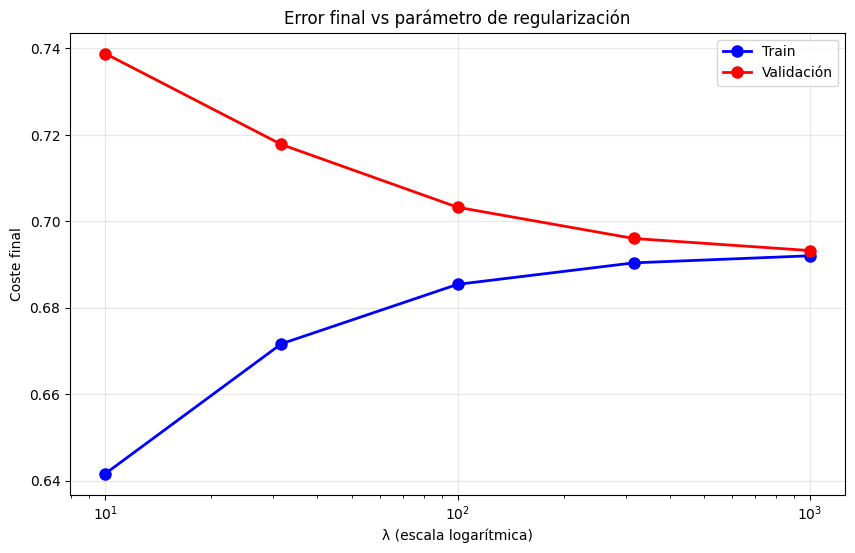

In [15]:
# TODO: Representa gráficamente el error final para cada valor de lambda

plt.figure(2, figsize=(10, 6))

plt.semilogx(lambdas, j_train, 'bo-', linewidth=2, markersize=8, label='Train')
plt.semilogx(lambdas, j_val, 'ro-', linewidth=2, markersize=8, label='Validación')

plt.xlabel('λ (escala logarítmica)')
plt.ylabel('Coste final')
plt.title('Error final vs parámetro de regularización')
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

### Escoger el mejor modelo

Copia el código de ejercicios anteriores, modificándolo si es necesario, para escoger el modelo con mayor precisión sobre el subset de validación:

In [16]:
lambda_ = 0
j_hist, theta_final = gradient_descent_logistic_regularized(X_train, Y_train, theta_init, alpha, lambda_, e=1e-6, iter_=10000)

print("Theta final:", theta_final)
print("Coste final:", j_hist[-1])
print("Lambda final:", lambda_)

Convergió en la iteración 4483
Theta final: [-0.02440015  2.11548101]
Coste final: 0.5273252366708403
Lambda final: 0


## Evaluar el modelo sobre el subset de test

Finalmente, vamos a evaluar el modelo sobre un subset de datos que no hemos usado para entrenarlo ni para escoger ningún hiper-parámetro.

Para ello, vamos a calcular el coste o error total sobre el subset de test y comprobar gráficamente los residuos sobre el mismo:

In [17]:
# TODO: Calcula el error del modelo sobre el subset de test usando la función de coste con las correspondientes theta y lambda
j_test = regularized_cost_function_logistic(X_test, Y_test, theta, lambda_ = 0)

print(f"Coste final: {j_test}")

Coste final: 0.692446189210139


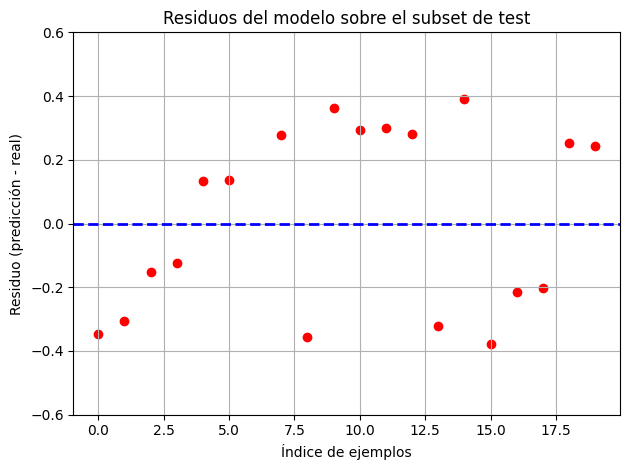

In [18]:
# # TODO: Calcula las predicciones del modelo sobre el subset de test, calcula los residuos y represéntalos frente al índice de ejemplos (m)

# Recuerda usar la función sigmoide para transformar las predicciones
Y_test_pred = sigmoid(X_test @ theta_final)
residuos = Y_test - Y_test_pred

plt.scatter(range(len(residuos)), residuos, color='red')
plt.axhline(y=0, color='blue', linestyle='--', linewidth=2)
plt.xlabel('Índice de ejemplos')
plt.ylabel('Residuo (predicción - real)')
plt.title('Residuos del modelo sobre el subset de test')
plt.grid(True)

# Límites simétricos para mejor visualización
plt.ylim(-0.6, 0.6)

plt.tight_layout()
plt.show()